# Project Three Notebook Example

For your final notebook, feel free to duplicate this notebook and edit as needed. 


## Load Some Stuff

This is where we load libraires and the like so we can do what we need. If you get an error saying a module is not loaded, open a new terminal/cmd line and try running: `pip install [module name]`. 

In [10]:
import os
try:
    inputFunc = raw_input
except NameError:
    inputFunc = input

import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
import numpy as np
 
import seaborn as sns
from statsmodels.formula.api import ols

from sklearn import linear_model
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from patsy import dmatrices

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

import random



# Custom functions

def evaluate(pred, labels_test):
    acc = accuracy_score(pred, labels_test)
    print ("Accuracey: %s"%acc)
    tn, fp, fn, tp = confusion_matrix(labels_test, pred).ravel()

    recall = tp / (tp + fp)
    percision = tp / (tp + fn)
    f1 = (2 / ((1/recall)+(1/percision)))

    print ("")
    print ("True Negatives: %s"%tn)
    print ("False Positives: %s"%fp)
    print ("False Negatives: %s"%fn)
    print ("True Positives: %s"%tp)
    print ("Recall: %s"%recall)
    print ("Precision: %s"%percision)
    print ("F1 Score: %s"%f1)

def plot_bound(Z_val,data,col1,col2,binary):
    # Z-val equals "Yes" value. E.g., "Y" or "1". 
    # data equals df
    # col1 and col2 defines which colums to use from data
    # Plot binary decision boundary. 
    # For this, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    
    x_min = float(data.iloc[:,[col1]].min())-float(data.iloc[:,[col1]].min())*0.10 
    x_max = float(data.iloc[:,[col1]].max()+float(data.iloc[:,[col1]].min())*0.10)
    y_min = 0.0; 
    y_max = float(training.iloc[:,[col2]].max())+float(training.iloc[:,[col2]].max())*0.10
    h_x = (x_max-x_min)/100  # step size in the mesh
    h_y = (y_max-y_min)/100  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h_x), np.arange(y_min, y_max, h_y))
    if binary == 1:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])   
        Z = np.where(Z=="Y",1,0)
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.pcolormesh(xx, yy, Z)
    plt.show()

## Data Cleaning

Here we load the data we collected and get it all ready to feed to our statistical model(s). That is, we are trying to make a table with one **target** column and one or more **features**. Here I'm loading happiness.csv from: https://data.somervillema.gov/Happiness/Somerville-Happiness-Survey-responses-2011-2013-20/w898-3dfm Note: you can find information on the data elements at this link. 


In [11]:
# Load and peek at your data. Change the file name as needed. 
raw_data_df = pd.read_csv('cleandata2.csv', parse_dates=[0]) 
raw_data_df.head()

,ID,Date,SP.change,NYC.temp,Visibility,NYC.wind,NYC.precip
0,1,11/18/16,-4.95,54,10,8,0.00
1,2,11/21/16,11.75,39,10,22,0.00
2,3,11/22/16,1.38,39,10,21,0.00
3,4,11/23/16,6.17,40,10,12,0.00
4,5,11/25/16,7.08,50,7,9,0.02


In [3]:
# You can explore unique entires by stating the column and using .unique() like this:
print(raw_data_df["S&P Open"].unique())
print(raw_data_df["NYC Wind (avg)"].unique())

[ 2186.850098  2186.429932  2201.560059  2198.550049  2206.27002
  2210.209961  2200.76001   2204.969971  2200.169922  2191.120117
  2200.649902  2207.26001   2210.719971  2241.129883  2249.72998
  2258.830078  2263.320068  2268.350098  2253.77002   2266.810059
  2259.23999   2266.5       2270.540039  2262.929932  2260.25      2266.22998
  2270.22998   2249.5       2251.610107  2251.570068  2261.600098
  2268.179932  2271.139893  2273.590088  2269.719971  2268.600098
  2272.73999   2269.139893  2271.899902  2269.959961  2267.780029
  2267.879883  2288.879883  2298.629883  2299.02002   2286.01001
  2274.02002   2285.590088  2276.689941  2288.540039  2294.280029
  2295.870117  2289.550049  2296.699951  2312.27002   2321.719971
  2326.120117  2335.580078  2349.639893  2343.01001   2354.909912
  2361.110107  2367.5       2355.72998   2365.22998   2366.080078
  2380.129883  2394.75      2380.919922  2375.22998   2370.73999
  2369.810059  2363.48999   2372.52002   2371.560059  2368.550049
  

In [ ]:
# You can explore rows with a specific value like so
raw_data_df[raw_data_df["What.is.your.annual.household.income."]=='R'].head() # remove .head() to see all entires

In [ ]:
# You can count the number of rows like so
print("Size of entire table: %s "%len(raw_data_df))
print("Size of entires matching filter: %s "%len(raw_data_df[raw_data_df["What.is.your.annual.household.income."]=='R']))

In [ ]:
# You can invert a match by using the 'not equal' evaluation.
print("Size of entires matching filter: %s "%len(raw_data_df[raw_data_df["What.is.your.annual.household.income."]!='R']))
raw_data_df[raw_data_df["What.is.your.annual.household.income."]!='R'].head()

In [ ]:
# You can make a new table from your filtered rows like so
processed_data_df = raw_data_df[raw_data_df["What.is.your.annual.household.income."]!='R']
processed_data_df = processed_data_df[processed_data_df["Age."]!='R']
# Note how I filtered first on raw_data_df and then on processed_data_df

# Now let's remove all students
processed_data_df = processed_data_df[processed_data_df["Are.you.a.student."]!='Yes']

# So how many entires are there?
print("Size of entire table: %s "%len(processed_data_df))
# Let's peak at the table.
processed_data_df.head()

In [ ]:
# for the special case of when a calue is NaN, you can filter based on the value not being null (i.e., empty)
processed_data_df = processed_data_df[pd.notnull(processed_data_df["What.is.your.annual.household.income."])]
processed_data_df = processed_data_df[pd.notnull(processed_data_df["Age."])]
print("Size of entire table: %s "%len(processed_data_df)) # in the example data, this gets rid of a few rows
processed_data_df.head()

In [ ]:
# You can remove unwanted colums like so
# for a single column
processed_data_df = processed_data_df.drop('In.general..how.similar.are.you.to.other.people.you.know._2011', 1)
# for multiple columns
processed_data_df = processed_data_df.drop([
                                            'How.satisfied.are.you.with.Somerville.as.a.place.to.live.',
                                            'How.satisfied.are.you.with.your.neighborhood.'
                                           ], 1)
processed_data_df.head()

In [ ]:
# Alternativly, if you want to make a new table from a subset of columns, you can do so like this.
processed_data_df = processed_data_df[[
                                        'How.happy.do.you.feel.right.now.', 
                                        'How.satisfied.are.you.with.your.life.in.general.', 
                                        'What.is.your.annual.household.income.',
                                        'Age.'
                                     ]].copy()
processed_data_df.head()

In [ ]:
# You can rename columns like so.
processed_data_df = processed_data_df.rename(columns={
                                                        'How.happy.do.you.feel.right.now.': 'happy', 
                                                        'How.satisfied.are.you.with.your.life.in.general.': 'satisfied',
                                                        'What.is.your.annual.household.income.': 'income',
                                                        'Age.': 'age',
                                                     })
processed_data_df.head()

In [ ]:
# You can replace values in a column based on logic like so
# Note: I used the unique values found above to inform my logic.
# That is, I took the unique text lables and translated them into numbers.
# It's clear that different surveys had different buckets. So I probably 
# sould limit myself to years using the same metrics, but for our purposes
# I'm just going to run with a quick and dirty translation. 

processed_data_df.loc[processed_data_df['income'] == 'Less than $10,000', 'income'] = 5000 
processed_data_df.loc[processed_data_df['income'] == '10,000 - $19,999', 'income'] = 15000
processed_data_df.loc[processed_data_df['income'] == '$10,000 to $24,999', 'income'] = 17500
processed_data_df.loc[processed_data_df['income'] == '20,000 - $29,999', 'income'] = 25000
processed_data_df.loc[processed_data_df['income'] == '$25,000 to $49,999', 'income'] = 37500
processed_data_df.loc[processed_data_df['income'] == '30,000 - $39,999', 'income'] = 35000
processed_data_df.loc[processed_data_df['income'] == '40,000 - $49,999', 'income'] = 45000
processed_data_df.loc[processed_data_df['income'] == '50,000 - $59,999', 'income'] = 55000
processed_data_df.loc[processed_data_df['income'] == '$50,000 to $74,999', 'income'] = 62500
processed_data_df.loc[processed_data_df['income'] == '60,000 - $69,999', 'income'] = 65000
processed_data_df.loc[processed_data_df['income'] == '70,000 - $79,999', 'income'] = 75000
processed_data_df.loc[processed_data_df['income'] == '$75,000 to $99,999', 'income'] = 87500
processed_data_df.loc[processed_data_df['income'] == '80,000 - $89,999', 'income'] = 85000
processed_data_df.loc[processed_data_df['income'] == '90,000 - $99,999', 'income'] = 95000
processed_data_df.loc[processed_data_df['income'] == '100,000 and up', 'income'] = 100000
processed_data_df.loc[processed_data_df['income'] == '$100,000 to $149,999', 'income'] = 125000 
processed_data_df.loc[processed_data_df['income'] == '$150,000 or more', 'income'] = 150000

processed_data_df.loc[processed_data_df['age'] == '18-21', 'age'] = 24
processed_data_df.loc[processed_data_df['age'] == '18-24', 'age'] = 21
processed_data_df.loc[processed_data_df['age'] == '22-25', 'age'] = 23.5
processed_data_df.loc[processed_data_df['age'] == '25-34', 'age'] = 29.5
processed_data_df.loc[processed_data_df['age'] == '26-30', 'age'] = 28
processed_data_df.loc[processed_data_df['age'] == '31-40', 'age'] = 35.5
processed_data_df.loc[processed_data_df['age'] == '35-44', 'age'] = 39.5
processed_data_df.loc[processed_data_df['age'] == '41-50', 'age'] = 46.5
processed_data_df.loc[processed_data_df['age'] == '45-54', 'age'] = 48
processed_data_df.loc[processed_data_df['age'] == '51-60', 'age'] = 55.5
processed_data_df.loc[processed_data_df['age'] == '55-64', 'age'] = 58
processed_data_df.loc[processed_data_df['age'] == '61+', 'age'] = 61
processed_data_df.loc[processed_data_df['age'] == '65-74', 'age'] = 69.5
processed_data_df.loc[processed_data_df['age'] == '75 or older', 'age'] = 75
processed_data_df.head()


In [7]:
# To make sure all of your columns are stored as numbers, use the pd.to_numeric method like so.
raw_data_df = raw_data_df.apply(pd.to_numeric, errors='coerce')
# errors='coerce' will set things that can't be converted to numbers to NaN
# so you'll want to drop these like so.
raw_data_df = raw_data_df.dropna()
raw_data_df.head()

,ID,Date,S&P Change (close - open),NYC Temp (avg),Avg Visibility (mi),NYC Wind (avg),NYC Precip (in)


In [ ]:
# You can add a columns like so.
processed_data_df["happy_Y_N"] = "N"
processed_data_df["satisfied_Y_N"] = "N"
processed_data_df.head()

In [ ]:
# And then you can customize these new coulmns using the same method as above. 
processed_data_df.loc[processed_data_df['happy'] >= 5, 'happy_Y_N'] = "Y"
processed_data_df.loc[processed_data_df['satisfied'] >= 5, 'satisfied_Y_N'] = "Y"
processed_data_df.head()

In [12]:
# I'm now going to make a set of tables to be used in training some models
# The first set will be for linear regressions where the traget is numeric.
# Happiness
happy_lin_df = raw_data_df[[
                               'SP.change', 
                               'NYC.temp', 
                               'Visibility',
                                'NYC.wind',
                                'NYC.precip'
                               ]].copy()
happy_lin_df.head()

,SP.change,NYC.temp,Visibility,NYC.wind,NYC.precip
0,-4.95,54,10,8,0.00
1,11.75,39,10,22,0.00
2,1.38,39,10,21,0.00
3,6.17,40,10,12,0.00
4,7.08,50,7,9,0.02


In [ ]:
# Satisfaction
sat_lin_df = processed_data_df[[
                               'satisfied', 
                               'age', 
                               'income'
                               ]].copy()
sat_lin_df.head()

In [ ]:
# The second set will be for classifiers where the target is a class.
# Happiness
happy_class_df = processed_data_df[[
                               'happy_Y_N', 
                               'age', 
                               'income'
                               ]].copy()
happy_class_df.head()

In [ ]:
# Satisfaction
sat_class_df = processed_data_df[[
                               'satisfied_Y_N', 
                               'age', 
                               'income'
                               ]].copy()
sat_class_df.head()

## Taining and Validation

Above I created four datasets worth exploring: 
- **`happy_lin_df`**. The data needed to access *happiness* along a continuous variable.
- **`sat_lin_df`**. The data needed to access *satisfaction* along a continuous variable.
- **`happy_class_df`**. The data needed to access *happiness* as a categorical variable.
- **`sat_class_df`**. The data needed to access *satisfaction* as a categorical variable.

Let's take them each in turn. 

## happy_lin_df



In [13]:
data = happy_lin_df



holdout = data.sample(frac=0.05)
training = data.loc[~data.index.isin(holdout.index)]

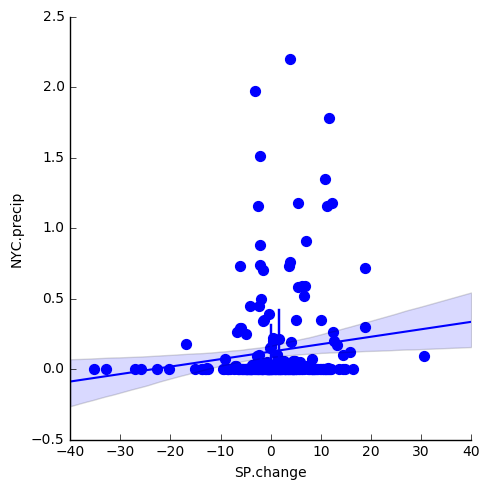

In [14]:
sns.lmplot(x="SP.change", y="NYC.precip", data=training, x_estimator=np.mean, order=1)

In [ ]:
sns.lmplot(x="income", y="happy", data=training, x_estimator=np.mean, order=1)

In [9]:
model = ols("SP.change ~ NYC.temp + NYC Wind", training).fit()
#model = ols("happy ~ age + income + np.power(age, 2) + np.power(income, 2)", training).fit()
model.summary()

SyntaxError: invalid syntax (<unknown>, line 1)

In [ ]:
# Rerun with SciKitLearn because it's easy to check accuracy
features_train = training.drop("happy", axis=1).as_matrix(columns=None)
labels_train = training["happy"].as_matrix(columns=None)

features_test = holdout.drop("happy", axis=1).as_matrix(columns=None)
labels_test = holdout["happy"].as_matrix(columns=None)

lm = linear_model.LinearRegression()
clf = lm.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy = metrics.r2_score(labels_test, pred)
print("R squared:",lm.score(features_train,labels_train))
print("Accuracy:",accuracy)

## sat_lin_df

In [ ]:
data = sat_lin_df

data = data[data["satisfied"]<=10]

holdout = data.sample(frac=0.05)
training = data.loc[~data.index.isin(holdout.index)]

In [ ]:
sns.lmplot(x="age", y="satisfied", data=training, x_estimator=np.mean, order=1)

In [ ]:
sns.lmplot(x="income", y="satisfied", data=training, x_estimator=np.mean, order=1)

In [ ]:
model = ols("satisfied ~ age + income", training).fit()
model.summary()

In [ ]:
# Rerun with SciKitLearn because it's easy to check accuracy

features_train = training.drop("satisfied", axis=1).as_matrix(columns=None)
labels_train = training["satisfied"].as_matrix(columns=None)

features_test = holdout.drop("satisfied", axis=1).as_matrix(columns=None)
labels_test = holdout["satisfied"].as_matrix(columns=None)

lm = linear_model.LinearRegression()
clf = lm.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy = metrics.r2_score(labels_test, pred)
print("R squared:",lm.score(features_train,labels_train))
print("Accuracy:",accuracy)

## happy_class_df

In [ ]:
data = happy_class_df
holdout = data.sample(frac=0.05)
training = data.loc[~data.index.isin(holdout.index)]

# Define the target (y) and feature(s) (X)
features_train = training.drop("happy_Y_N", axis=1).as_matrix(columns=None)
labels_train = training["happy_Y_N"].as_matrix(columns=None)

features_test = holdout.drop("happy_Y_N", axis=1).as_matrix(columns=None)
labels_test = holdout["happy_Y_N"].as_matrix(columns=None)

# What percentage of the time is target Y?
print("Percentage of Ys: %s\n"%(len(data[data["happy_Y_N"]=="Y"])/len(data)))

#### initial visualization
feature_1_no = [features_test[ii][0] for ii in range(0, len(features_test)) if labels_test[ii]=="N"]
feature_2_no = [features_test[ii][1] for ii in range(0, len(features_test)) if labels_test[ii]=="N"]
feature_1_yes = [features_test[ii][0] for ii in range(0, len(features_test)) if labels_test[ii]=="Y"]
feature_2_yes = [features_test[ii][1] for ii in range(0, len(features_test)) if labels_test[ii]=="Y"]
plt.scatter(feature_1_yes, feature_2_yes, color = "g", label="Happy")
plt.scatter(feature_1_no, feature_2_no, color = "r", label="Unhappy")
plt.legend()
plt.xlabel("age")
plt.ylabel("income")
plt.show()


In [ ]:
# Logistic Regression
model = LogisticRegression(fit_intercept = False, C = 1e9)
clf = model.fit(features_train, labels_train)
pred = clf.predict(features_test)
print("Logistic Regression")
evaluate(pred, labels_test)  
plot_bound("Y",holdout,1,2,0)


# Test some spot
x_test = 70
y_test = 160000
print("")
print(clf.predict([[x_test,y_test]])[0])
print(clf.predict_proba([[x_test,y_test]])[0][1])
print("")

from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_split=40)
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print("\nDecision Tree")
evaluate(pred, labels_test)
plot_bound("Y",holdout,1,2,0)



from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print("Random Forest")
evaluate(pred, labels_test)  
plot_bound("Y",holdout,1,2,0)


from sklearn.svm import SVC
clf = SVC(kernel="rbf",probability=True)
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print("SVM")
evaluate(pred, labels_test)  
#plot_bound("Y",holdout,1,2,0) # plot doesn't work with SVM

## sat_class_df

In [ ]:
data = sat_class_df
holdout = data.sample(frac=0.05)
training = data.loc[~data.index.isin(holdout.index)]

# Define the target (y) and feature(s) (X)
features_train = training.drop("satisfied_Y_N", axis=1).as_matrix(columns=None)
labels_train = training["satisfied_Y_N"].as_matrix(columns=None)

features_test = holdout.drop("satisfied_Y_N", axis=1).as_matrix(columns=None)
labels_test = holdout["satisfied_Y_N"].as_matrix(columns=None)

# What percentage of the time is target Y?
print("Percentage of Ys: %s\n"%(len(data[data["satisfied_Y_N"]=="Y"])/len(data)))

#### initial visualization
feature_1_no = [features_test[ii][0] for ii in range(0, len(features_test)) if labels_test[ii]=="N"]
feature_2_no = [features_test[ii][1] for ii in range(0, len(features_test)) if labels_test[ii]=="N"]
feature_1_yes = [features_test[ii][0] for ii in range(0, len(features_test)) if labels_test[ii]=="Y"]
feature_2_yes = [features_test[ii][1] for ii in range(0, len(features_test)) if labels_test[ii]=="Y"]
plt.scatter(feature_1_yes, feature_2_yes, color = "g", label="Happy")
plt.scatter(feature_1_no, feature_2_no, color = "r", label="Unhappy")
plt.legend()
plt.xlabel("age")
plt.ylabel("income")
plt.show()

In [ ]:
# Logistic Regression
model = LogisticRegression(fit_intercept = False, C = 1e9)
clf = model.fit(features_train, labels_train)
pred = clf.predict(features_test)
print("Logistic Regression")
evaluate(pred, labels_test)  
plot_bound("Y",holdout,1,2,0)


# Test some spot
x_test = 70
y_test = 160000
print("")
print(clf.predict([[x_test,y_test]])[0])
print(clf.predict_proba([[x_test,y_test]])[0][1])
print("")

from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_split=40)
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print("\nDecision Tree")
evaluate(pred, labels_test)
plot_bound("Y",holdout,1,2,0)



from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print("Random Forest")
evaluate(pred, labels_test)  
plot_bound("Y",holdout,1,2,0)


from sklearn.svm import SVC
clf = SVC(kernel="rbf",probability=True)
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print("SVM")
evaluate(pred, labels_test)  
#plot_bound("Y",holdout,1,2,0) # plot doesn't work with SVM